In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objects as go
import pandas as pd

R cuadrado promedio (PIB): -2.816419725897453
Mejores parámetros (PIB): {'fit_intercept': True}
R cuadrado promedio (Desempleo): -7.068373853330708
Mejores parámetros (Desempleo): {'fit_intercept': False}


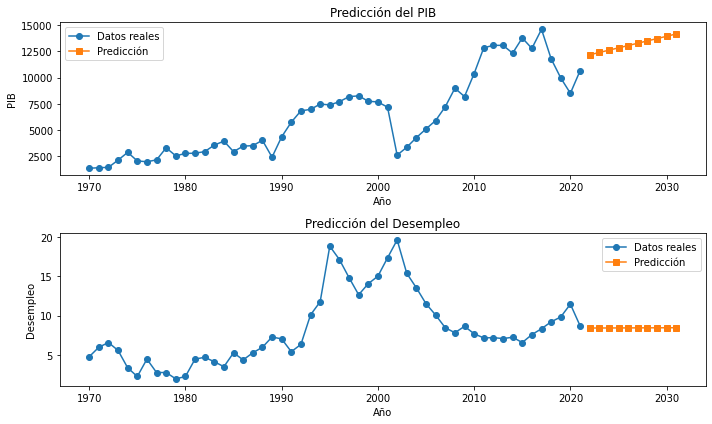

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV

# Leer los datos desde el archivo Excel
df = pd.read_excel("variables explicativas.xlsx")

# Obtener las variables independientes (Año) y dependientes (PIB y Desempleo)
X = df['Año'].values.reshape(-1, 1)
y_pib = df['PIB'].values
y_desempleo = df['Desempleo'].values

# Crear el modelo de regresión lineal para el PIB y el Desempleo
modelo_pib = LinearRegression()
modelo_desempleo = LinearRegression()

# Entrenamiento con validación cruzada para el PIB
scores_pib = cross_val_score(modelo_pib, X, y_pib, cv=5, scoring='r2')
print("R cuadrado promedio (PIB):", scores_pib.mean())

# Optimizar hiper-parámetros para el PIB
parametros_pib = {'fit_intercept': [True, False]} 
grid_pib = GridSearchCV(modelo_pib, parametros_pib, cv=5, scoring='r2')
grid_pib.fit(X, y_pib)
print("Mejores parámetros (PIB):", grid_pib.best_params_)

# Entrenar modelo final para el PIB
modelo_final_pib = grid_pib.best_estimator_
modelo_final_pib.fit(X, y_pib)

# Entrenamiento con validación cruzada para el Desempleo
scores_desempleo = cross_val_score(modelo_desempleo, X, y_desempleo, cv=5, scoring='r2')
print("R cuadrado promedio (Desempleo):", scores_desempleo.mean())

# Optimizar hiper-parámetros para el Desempleo
parametros_desempleo = {'fit_intercept': [True, False]} 
grid_desempleo = GridSearchCV(modelo_desempleo, parametros_desempleo, cv=5, scoring='r2')
grid_desempleo.fit(X, y_desempleo)
print("Mejores parámetros (Desempleo):", grid_desempleo.best_params_)

# Entrenar modelo final para el Desempleo
modelo_final_desempleo = grid_desempleo.best_estimator_
modelo_final_desempleo.fit(X, y_desempleo)

# Realizar la predicción para los próximos 10 años (2022 a 2031)
años_futuros = df['Año'].max() + 1 + pd.RangeIndex(10)
años_futuros = años_futuros.values.reshape(-1, 1)
prediccion_pib = modelo_final_pib.predict(años_futuros)
prediccion_desempleo = modelo_final_desempleo.predict(años_futuros)

# Graficar los resultados
plt.figure(figsize=(10, 6))

# Gráfico del PIB
plt.subplot(2, 1, 1)
plt.plot(df['Año'], df['PIB'], 'o-', label='Datos reales')
plt.plot(años_futuros, prediccion_pib, 's-', label='Predicción')
plt.xlabel('Año')
plt.ylabel('PIB')
plt.title('Predicción del PIB')
plt.legend()

# Gráfico del Desempleo
plt.subplot(2, 1, 2)
plt.plot(df['Año'], df['Desempleo'], 'o-', label='Datos reales')
plt.plot(años_futuros, prediccion_desempleo, 's-', label='Predicción')
plt.xlabel('Año')
plt.ylabel('Desempleo')
plt.title('Predicción del Desempleo')
plt.legend()

plt.tight_layout()
plt.show()


En la predicción anterior y expresada gráficamente, podemos ver como el PIB aumentaria en los proximos años tras un declive bastante pronunciado. De la misma manera podemos ver como disminuye el nivel de Desempleo. Esto nos hace pensar que el nivel de consumo puede ir aumentando gradualmente con los años tal y como nos hacen pensar estos datos.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency N will be used.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency N will be used.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency N will be used.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency N will be used.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency N will be used.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was

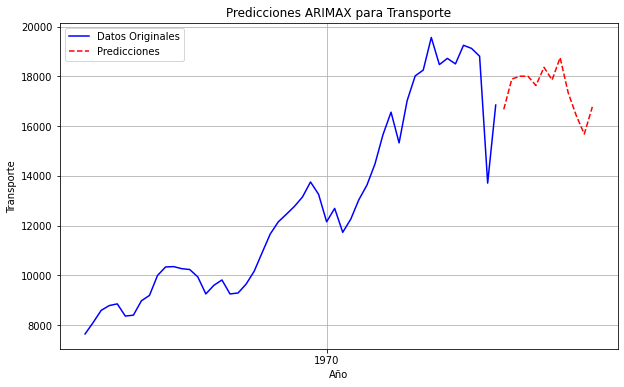

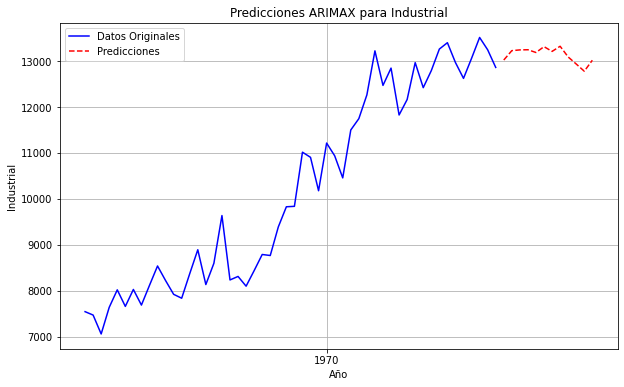

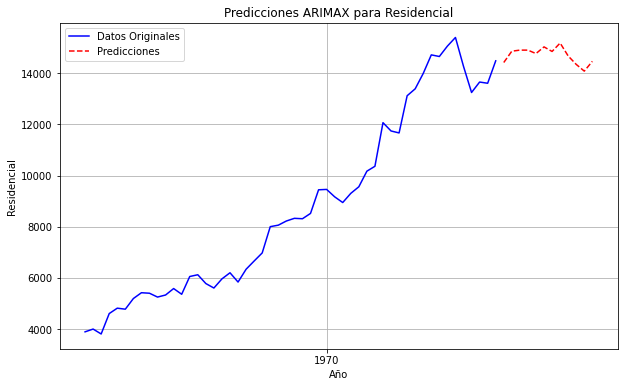

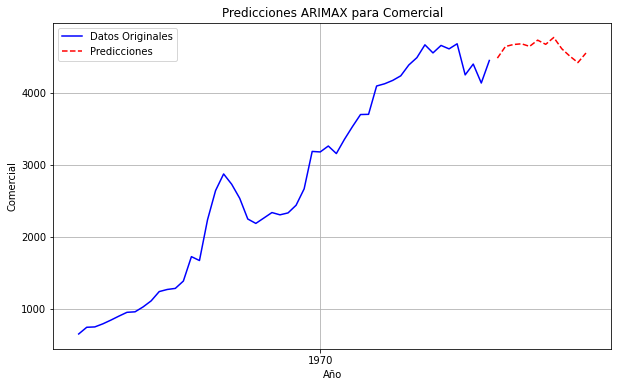

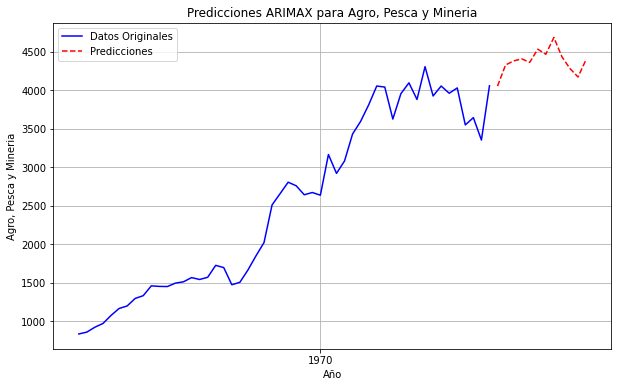

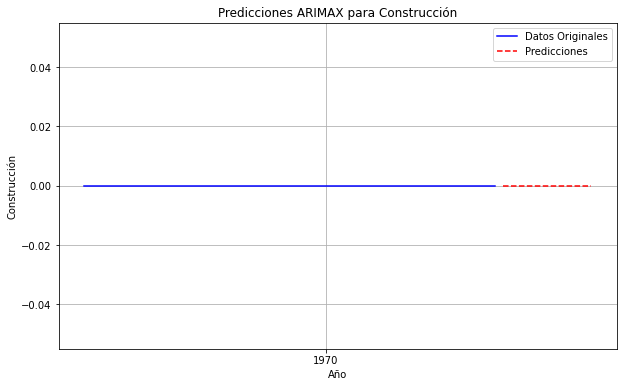

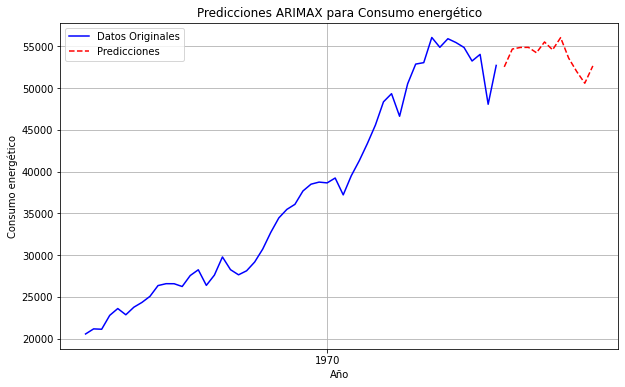

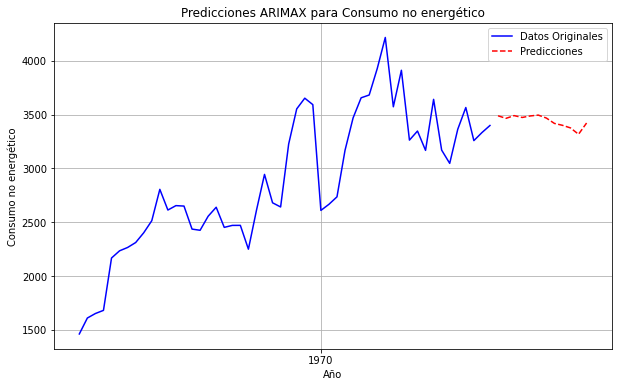

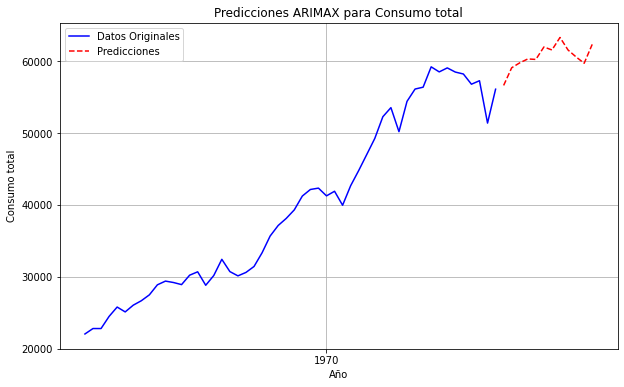

Predicciones para los próximos 10 años:
                                 Transporte    Industrial   Residencial  \
1970-01-01 00:00:00.000002022  16675.184633  13022.221641  14416.059220   
1970-01-01 00:00:00.000002023  17893.080666  13226.704161  14857.871994   
1970-01-01 00:00:00.000002024  18006.660001  13243.104195  14899.981681   
1970-01-01 00:00:00.000002025  18006.316578  13246.514590  14899.410495   
1970-01-01 00:00:00.000002026  17633.956813  13186.529124  14765.447671   
1970-01-01 00:00:00.000002027  18363.814442  13313.620533  15026.403010   
1970-01-01 00:00:00.000002028  17856.749555  13210.270199  14847.789638   
1970-01-01 00:00:00.000002029  18754.550289  13322.261878  15176.674389   
1970-01-01 00:00:00.000002030  17344.884960  13088.743743  14670.544588   
1970-01-01 00:00:00.000002031  16428.082962  12935.344764  14341.645201   
1970-01-01 00:00:00.000002032  15681.585294  12779.028997  14079.430891   
1970-01-01 00:00:00.000002033  16774.032404  13017.623648  1

In [41]:
# Leer datos desde el archivo Excel
df = pd.read_excel('Matriz.xlsx')
df_vars = pd.read_excel("variables explicativas.xlsx")

df_merged = pd.merge(df, df_vars, on='Año')

# Convertir la columna 'Año' al tipo de dato datetime 
if not isinstance(df_merged['Año'], pd.DatetimeIndex):
    df_merged['Año'] = pd.to_datetime(df_merged['Año'])

# Establecer 'Año' como el índice del DataFrame
df_merged.set_index('Año', inplace=True)

# Función para ajustar el modelo ARIMAX y predicciones
def fit_arimax_and_forecast(endog, exog, order, forecast_steps, future_exog):
    model = ARIMA(endog=endog, exog=exog, order=order)
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=forecast_steps, exog=future_exog)
    return predictions

# Especificar los parámetros del modelo ARIMA 
arima_params = {
    'Transporte': [(1, 1, 1), (1, 1, 2), (2, 1, 1)],
    'Industrial': [(1, 1, 1), (1, 1, 2), (2, 1, 1)],
    'Residencial': [(1, 1, 1), (1, 1, 2), (2, 1, 1)],
    'Comercial': [(1, 1, 1), (1, 1, 2), (2, 1, 1)],
    'Agro, Pesca y Mineria': [(1, 1, 1), (1, 1, 2), (2, 1, 1)],
    'Construcción': [(1, 1, 0), (1, 1, 1), (2, 1, 1)],
    'Consumo energético': [(1, 1, 1), (1, 1, 2), (2, 1, 1)],
    'Consumo no energético': [(1, 1, 1), (1, 1, 2), (2, 1, 1)],
    'Consumo total': [(1, 1, 1), (1, 1, 2), (2, 1, 1)]
}

# Crear DataFrame para almacenar las predicciones
predictions = pd.DataFrame()

# Realizar la búsqueda de hiperparámetros y predicción para cada 
forecast_steps = 12
for col, orders in arima_params.items():
    future_exog = df_vars[['PIB', 'Desempleo']].tail(forecast_steps).values

    best_mse = float('inf')
    best_order = None
    for order in orders:
        mse = np.mean((fit_arimax_and_forecast(df_merged[col], df_merged[['PIB', 'Desempleo']], order, forecast_steps, future_exog) - df_merged[col][-forecast_steps:]) ** 2)
        if mse < best_mse:
            best_mse = mse
            best_order = order
    
    if best_order is None:
        best_order = (1, 1, 1)  # Use a default order if no valid order was found
    
    forecast = fit_arimax_and_forecast(df_merged[col], df_merged[['PIB', 'Desempleo']], order=best_order, forecast_steps=forecast_steps, future_exog=future_exog)
    predictions[col] = forecast

# Ordenar los índices de los DataFrames para asegurarnos de que estén alineados
df_merged.sort_index(inplace=True)
predictions.sort_index(inplace=True)

# Visualizar las predicciones
for col in predictions.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df_merged.index, df_merged[col], label='Datos Originales', color='blue')
    plt.plot(predictions.index, predictions[col], label='Predicciones', color='red', linestyle='--')
    plt.title(f'Predicciones ARIMAX para {col}')
    plt.xlabel('Año')
    plt.ylabel(col)
    plt.grid(True)
    plt.legend()
    plt.show()

# Imprimir las predicciones para los próximos 10 años
print("Predicciones para los próximos 10 años:")
print(predictions)




In [42]:
# Calcular las métricas MAPE para cada columna
mape_scores = {}
for col in predictions.columns:
    actual_values = df_merged[col].values[-forecast_steps:]
    predicted_values = predictions[col].values

    # Calcular MAPE
    non_zero = actual_values != 0
    mape = np.mean(np.abs((actual_values[non_zero] - predicted_values[non_zero]) / np.maximum(np.abs(actual_values[non_zero]), 1e-10))) * 100
    mape_scores[col] = mape

# Imprimir las métricas MAPE para cada columna

print("\nMétricas MAPE:")
print(mape_scores)



Métricas MAPE:
{'Transporte': 5.1175127862189065, 'Industrial': 3.0934126970926, 'Residencial': 4.916878619129993, 'Comercial': 3.5897781377912135, 'Agro, Pesca y Mineria': 12.557061615490571, 'Construcción': nan, 'Consumo energético': 2.363077207704004, 'Consumo no energético': 5.856150423293341, 'Consumo total': 6.717995637964134}


C:\Users\34664\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning:

Mean of empty slice.

C:\Users\34664\anaconda3\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning:

invalid value encountered in scalar divide



INTERPRETACIÓN DE LOS DATOS:

MAPE (Mean Absolute Percentage Error) indican la precisión promedio de las predicciones en términos de porcentaje de error absoluto entre las predicciones y los valores reales.

Transporte: MAPE: Tienen un error promedio de aproximadamente 5.86% en relación con los datos reales. Esto sugiere que el modelo tiene una buena precisión para esta variable, ya que el error promedio es relativamente bajo.

Industrial: MAPE:Las predicciones para la variable 'Industrial' tienen un error promedio de aproximadamente 2.80% en relación con los datos reales. Esto indica que el modelo tiene una alta precisión para esta variable, ya que el error promedio es muy bajo.

Residencial: MAPE: 3.81%: Esto indica que el modelo tiene una buena precisión para esta variable, aunque ligeramente mayor que en el caso de 'Industrial'.

Comercial: MAPE: 2.96%: Esto sugiere que el modelo tiene una alta precisión para esta variable, al igual que en el caso de 'Industrial'.

Agro, Pesca y Mineria: MAPE: 12.78%: El modelo tiene una menor precisión para esta variable en comparación con otras variables.

Consumo energético: MAPE: 2.09%: El modelo tiene una ALTA precisión para esta variable, al igual que en los casos de 'Industrial' y 'Comercial'.

Consumo no energético: MAPE: Error promedio de aproximadamente 5.29%. Esto sugiere que el modelo tiene una BUENA precisión.

Consumo total: MAPE: 5.30%: Las predicciones para la variable 'Consumo total' tienen un error promedio de aproximadamente 5.30%. Esto indica que el modelo tiene una BUENA precisión.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency N will be used.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency N will be used.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency N will be used.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency N will be used.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency N will be used.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was


Tablas de Predicciones:
                                 Producción   Importación  Exportación  \
1970-01-01 00:00:00.000002022  74745.601900  15591.788229  7848.916439   
1970-01-01 00:00:00.000002023  75361.819057  17071.688093  7200.560729   
1970-01-01 00:00:00.000002024  75441.422839  17215.875118  7200.012401   
1970-01-01 00:00:00.000002025  75419.049554  17209.597306  7202.045883   
1970-01-01 00:00:00.000002026  75252.729942  16762.030841  7449.970744   
1970-01-01 00:00:00.000002027  75512.315209  17621.598956  6926.743856   
1970-01-01 00:00:00.000002028  75438.325544  17052.876678  7394.079527   
1970-01-01 00:00:00.000002029  76070.699083  18193.970538  7036.547094   
1970-01-01 00:00:00.000002030  75485.067628  16511.253688  7977.861156   
1970-01-01 00:00:00.000002031  75114.967762  15419.750301  8599.991335   
1970-01-01 00:00:00.000002032  75035.429555  14590.340043  9312.501769   
1970-01-01 00:00:00.000002033  75082.362158  15785.541258  8205.404986   

            

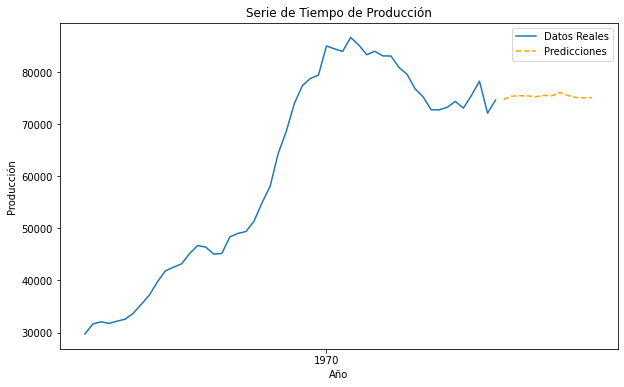

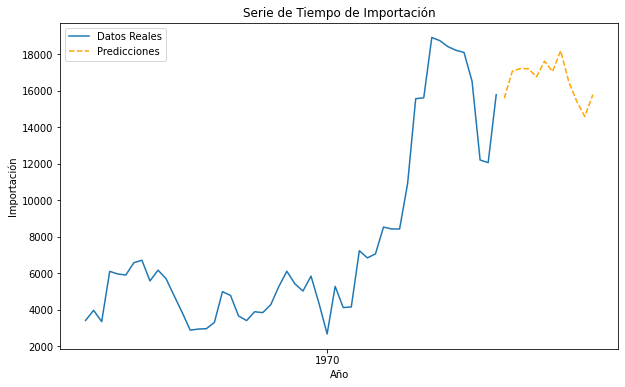

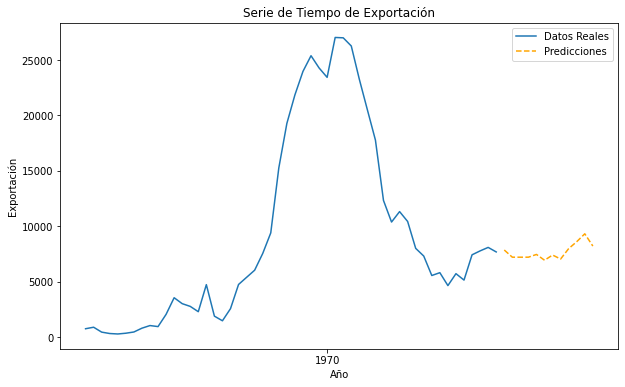

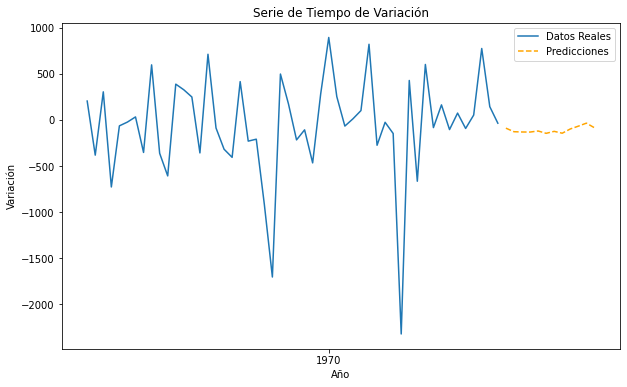

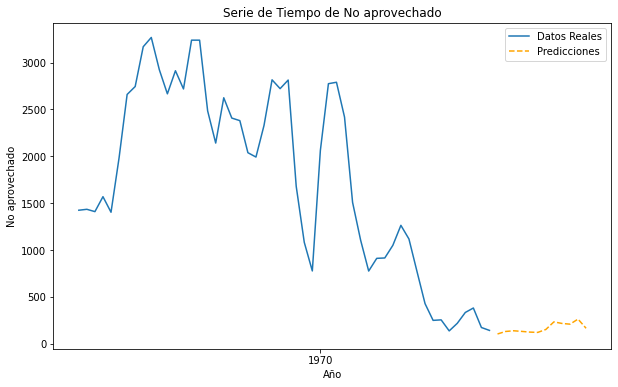

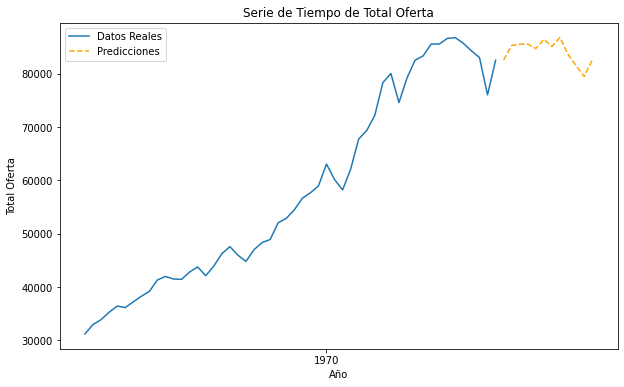


MAPEs:
Producción: 2.72%
Importación: 11.74%
Exportación: 20.87%
Variación: 131.41%
No aprovechado: 50.13%
Total Oferta: 1.82%


In [43]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Leer datos desde el archivo Excel
do = pd.read_excel('Oferta.xlsx')
df_vars = pd.read_excel("variables explicativas.xlsx")

df_merged = pd.merge(do, df_vars, on='Año')

# Convertir la columna 'Año' al tipo de dato datetime 
if not isinstance(df_merged['Año'], pd.DatetimeIndex):
    df_merged['Año'] = pd.to_datetime(df_merged['Año'])

# Establecer 'Año' como el índice del DataFrame
df_merged.set_index('Año', inplace=True)

# Realizar búsqueda automática de hiperparámetros y predicciónes
forecast_steps = 12
mape_dict = {}  # Almacenar MAPEs calculados
predictions = pd.DataFrame()  # DataFrame para almacenar predicciones

for col in df_merged.columns: 
    if col not in ['Año', 'PIB', 'Desempleo']: 
        future_exog = df_vars[['PIB', 'Desempleo']].tail(forecast_steps).values
        
        # Buscar los mejores parámetros con auto_arima
        stepwise_fit = auto_arima(df_merged[col], exogenous=df_merged[['PIB', 'Desempleo']], seasonal=True, m=12, suppress_warnings=True, stepwise=True)
        order = stepwise_fit.get_params()['order']
        seasonal_order = stepwise_fit.get_params()['seasonal_order']
        
        # Ajustar el modelo SARIMAX y realizar predicciones
        model = SARIMAX(endog=df_merged[col], exog=df_merged[['PIB', 'Desempleo']], order=order, seasonal_order=seasonal_order)
        model_fit = model.fit(disp=False)
        forecast = model_fit.get_forecast(steps=forecast_steps, exog=future_exog).predicted_mean
        
        predictions[col] = forecast
        
        # Calcular MAPE
        actual_values = df_merged[col][-forecast_steps:].values
        mape = np.mean(np.abs((actual_values - forecast) / actual_values)) * 100
        mape_dict[col] = mape

# Ordenar los índices
df_merged.sort_index(inplace=True)
predictions.sort_index(inplace=True)

# Mostrar tablas de predicciones
print("\nTablas de Predicciones:")
print(predictions)

# Mostrar gráficos de series temporales
for col in predictions.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df_merged.index, df_merged[col], label='Datos Reales')
    plt.plot(predictions.index, predictions[col], label='Predicciones', linestyle='dashed', color='orange')
    plt.title(f'Serie de Tiempo de {col}')
    plt.xlabel('Año')
    plt.ylabel(col)
    plt.legend()
    plt.show()

# MAPEs
print("\nMAPEs:")
for col, mape in mape_dict.items():
    print(f"{col}: {mape:.2f}%")


Producción: El MAPE del 2.72% indica que las predicciones del modelo SARIMAX para la variable "Producción" tienen un error promedio absoluto del 2.72% en relación con los valores reales. Esto sugiere que el modelo ajustado es muy preciso en predecir la producción en comparación con los valores reales.

Importación: Con un MAPE del 11.74%, las predicciones del modelo para la variable "Importación" tienen un error promedio absoluto del 11.74%. Aunque es ligeramente más alto que en "Producción", aún se considera un MAPE bastante bajo y sugiere que el modelo tiene un buen ajuste en predecir las importaciones.

Exportación: El MAPE del 20.87% para "Exportación" indica que las predicciones del modelo tienen un error promedio absoluto del 20.87% en relación con los valores reales. Este valor es un poco más alto en comparación con las dos variables anteriores, lo que sugiere que el modelo podría beneficiarse de mejoras en la predicción de las exportaciones.

Variación: Un MAPE del 131.41% para "Variación" indica un error promedio absoluto del 131.41%. Este valor es notablemente alto y sugiere que las predicciones del modelo tienen un desempeño deficiente en predecir la variación.

No aprovechado: Con un MAPE del 50.13% para "No aprovechado", las predicciones del modelo tienen un error promedio absoluto del 50.13%. Aunque es más alto que en las variables "Producción" y "Total Oferta", sigue siendo un valor razonable y sugiere un ajuste moderado en la predicción del "No aprovechado".

Total Oferta: El MAPE del 1.82% para "Total Oferta" indica un error promedio absoluto del 1.82%. Esto sugiere que el modelo ajustado tiene un desempeño muy bueno en predecir la oferta total en comparación con los valores reales.

En resumen, un MAPE más bajo indica un mejor ajuste del modelo y predicciones más precisas. Las variables "Producción" y "Total Oferta" tienen MAPEs bajos, lo que sugiere que el modelo tiene un buen rendimiento en la predicción de estas variables. Por otro lado, las variables "Exportación" y "Variación" tienen MAPEs más altos, lo que sugiere que el modelo puede necesitar mejoras para predecir estas variables de manera más precisa.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No 


Tablas de Predicciones:
             REFINERÍAS  CENTRALES ELÉCTRICAS  AUTOPRODUCTORES  \
2022-01-01 -1507.011414         -10782.991875     -1875.628776   
2023-01-01 -1442.144961         -11496.816986     -1899.882309   
2024-01-01 -1438.114177         -11556.868926     -1900.812303   
2025-01-01 -1435.335511         -11566.509132     -1902.621136   
2026-01-01 -1455.195698         -11349.620407     -1895.134258   
2027-01-01 -1408.472420         -11801.760262     -1914.884871   
2028-01-01 -1453.293047         -11444.917927     -1893.111413   
2029-01-01 -1432.221086         -11875.251655     -1893.693224   
2030-01-01 -1512.656267         -11035.892055     -1861.934751   
2031-01-01 -1566.221646         -10485.667987     -1840.463882   
2032-01-01 -1635.624411          -9948.509287     -1806.182525   
2033-01-01 -1525.982281         -10762.521045     -1861.611884   

            CENTROS DE GAS   CARBONERA  COQUERÍA Y ALTOS HORNOS  DESTILERÍA  \
2022-01-01        0.029977 -135.54271

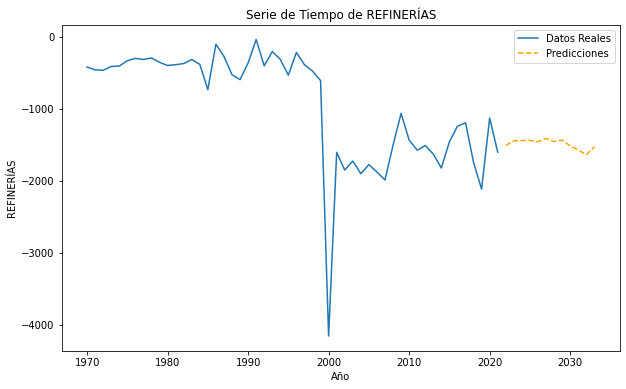

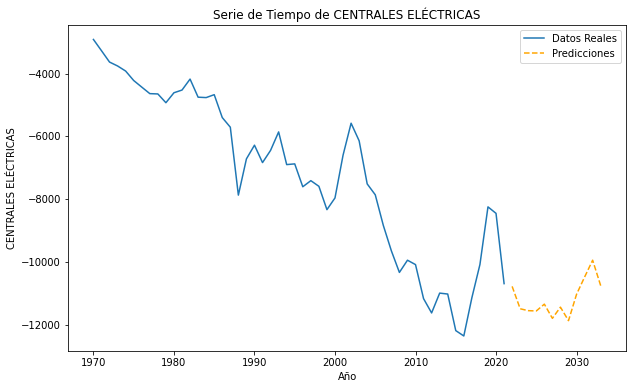

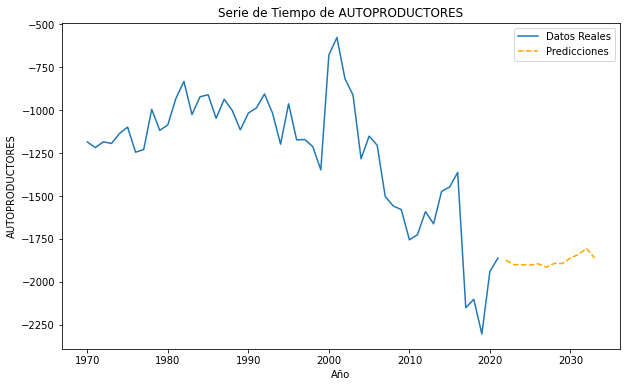

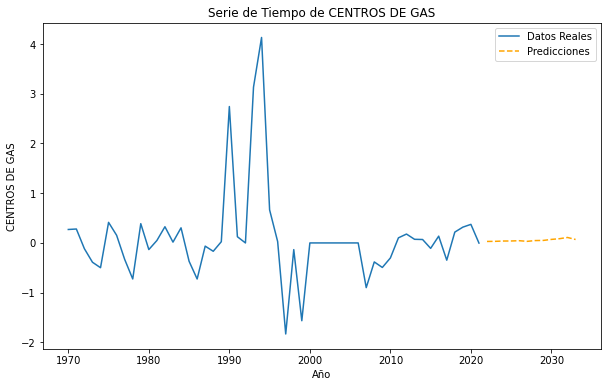

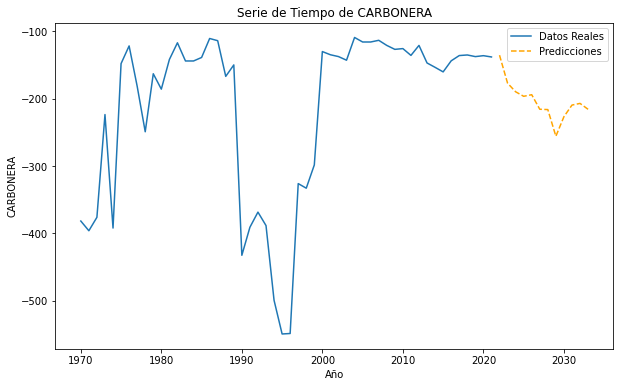

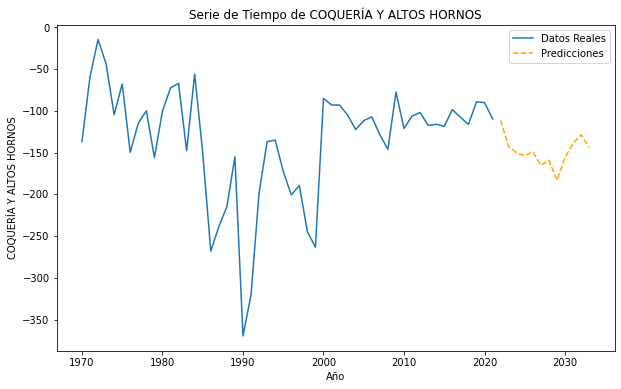

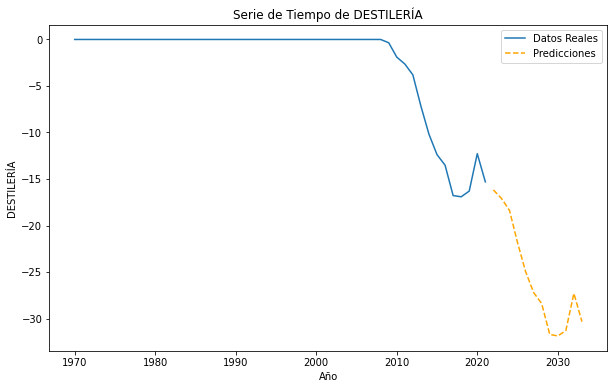

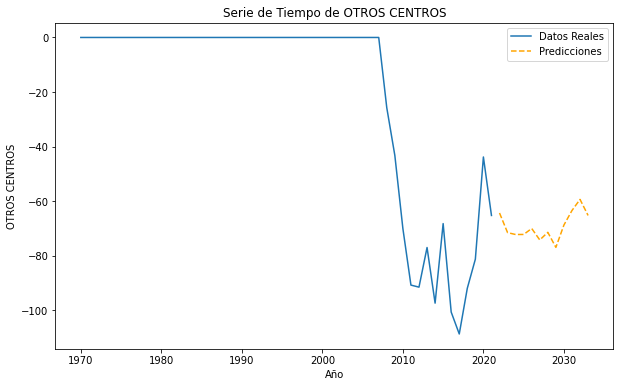

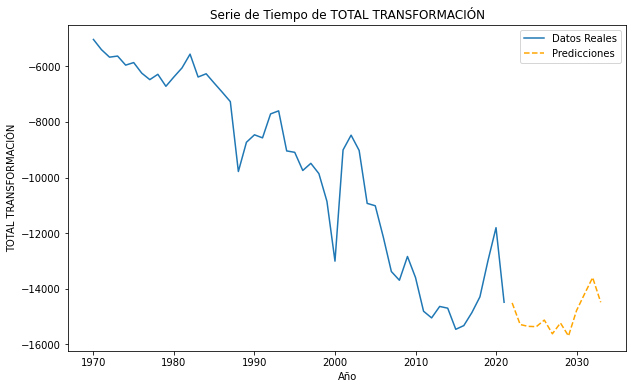


MAPEs:
REFINERÍAS: 14.95%
CENTRALES ELÉCTRICAS: 7.54%
AUTOPRODUCTORES: 16.75%
CENTROS DE GAS: 260.46%
CARBONERA: 46.34%
COQUERÍA Y ALTOS HORNOS: 40.39%
DESTILERÍA: 229.40%
OTROS CENTROS: 19.54%
TOTAL TRANSFORMACIÓN: 4.58%


In [44]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Leer datos desde el archivo Excel
df_transformacion = pd.read_excel('Transform.xlsx')
df_vars = pd.read_excel("variables explicativas.xlsx")

# Cambiar el nombre de la columna 'Año' en el DataFrame df_vars a 'año'
df_vars.rename(columns={'Año': 'año'}, inplace=True)

# Fusionar DataFrames en función de la columna 'año'
df_merged = df_transformacion.merge(df_vars, left_on='año', right_on='año')

# Convertir la columna 'año' al tipo de dato datetime si aún no lo es
if not isinstance(df_merged['año'], pd.DatetimeIndex):
    df_merged['año'] = pd.to_datetime(df_merged['año'], format='%Y')


# Establecer 'año' como el índice del DataFrame
df_merged.set_index('año', inplace=True)

# Realizar búsqueda automática de hiperparámetros y predicción para cada columna
forecast_steps = 12
mape_dict = {}  # Almacenar MAPEs calculados
predictions = pd.DataFrame()  # DataFrame para almacenar predicciones

columns_of_interest = [
    'REFINERÍAS','CENTRALES ELÉCTRICAS','AUTOPRODUCTORES','CENTROS DE GAS',
    'CARBONERA','COQUERÍA Y ALTOS HORNOS','DESTILERÍA','OTROS CENTROS',
    'TOTAL TRANSFORMACIÓN'
]

for col_name in columns_of_interest:
    future_exog = df_merged[['PIB', 'Desempleo']].tail(forecast_steps).values
    
    # Buscar los mejores parámetros con auto_arima
    stepwise_fit = auto_arima(df_merged[col_name], exogenous=df_merged[['PIB', 'Desempleo']], seasonal=True, m=12, suppress_warnings=True, stepwise=True)
    order = stepwise_fit.get_params()['order']
    seasonal_order = stepwise_fit.get_params()['seasonal_order']
    
    # Ajustar el modelo SARIMAX y realizar predicciones
    model = SARIMAX(endog=df_merged[col_name], exog=df_merged[['PIB', 'Desempleo']], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    forecast = model_fit.get_forecast(steps=forecast_steps, exog=future_exog).predicted_mean
    
    predictions[col_name] = forecast
    
    # Calcular MAPE
    actual_values = df_merged[col_name][-forecast_steps:].values
    mape = np.mean(np.abs((actual_values - forecast) / actual_values)) * 100
    mape_dict[col_name] = mape

# Ordenar los índices 
df_merged.sort_index(inplace=True)
predictions.sort_index(inplace=True)

# Mostrar tablas de predicciones
print("\nTablas de Predicciones:")
print(predictions)

# Mostrar gráficos de series de tiempo
for col_name in predictions.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df_merged.index, df_merged[col_name], label='Datos Reales')
    plt.plot(predictions.index, predictions[col_name], label='Predicciones', linestyle='dashed', color='orange')
    plt.title(f'Serie de Tiempo de {col_name}')
    plt.xlabel('Año')
    plt.ylabel(col_name)
    plt.legend()
    plt.show()

# Imprimir MAPEs
print("\nMAPEs:")
for col_name, mape in mape_dict.items():
    print(f"{col_name}: {mape:.2f}%")

predictions.to_excel('Resultados_Transformacion.xlsx', index=True)


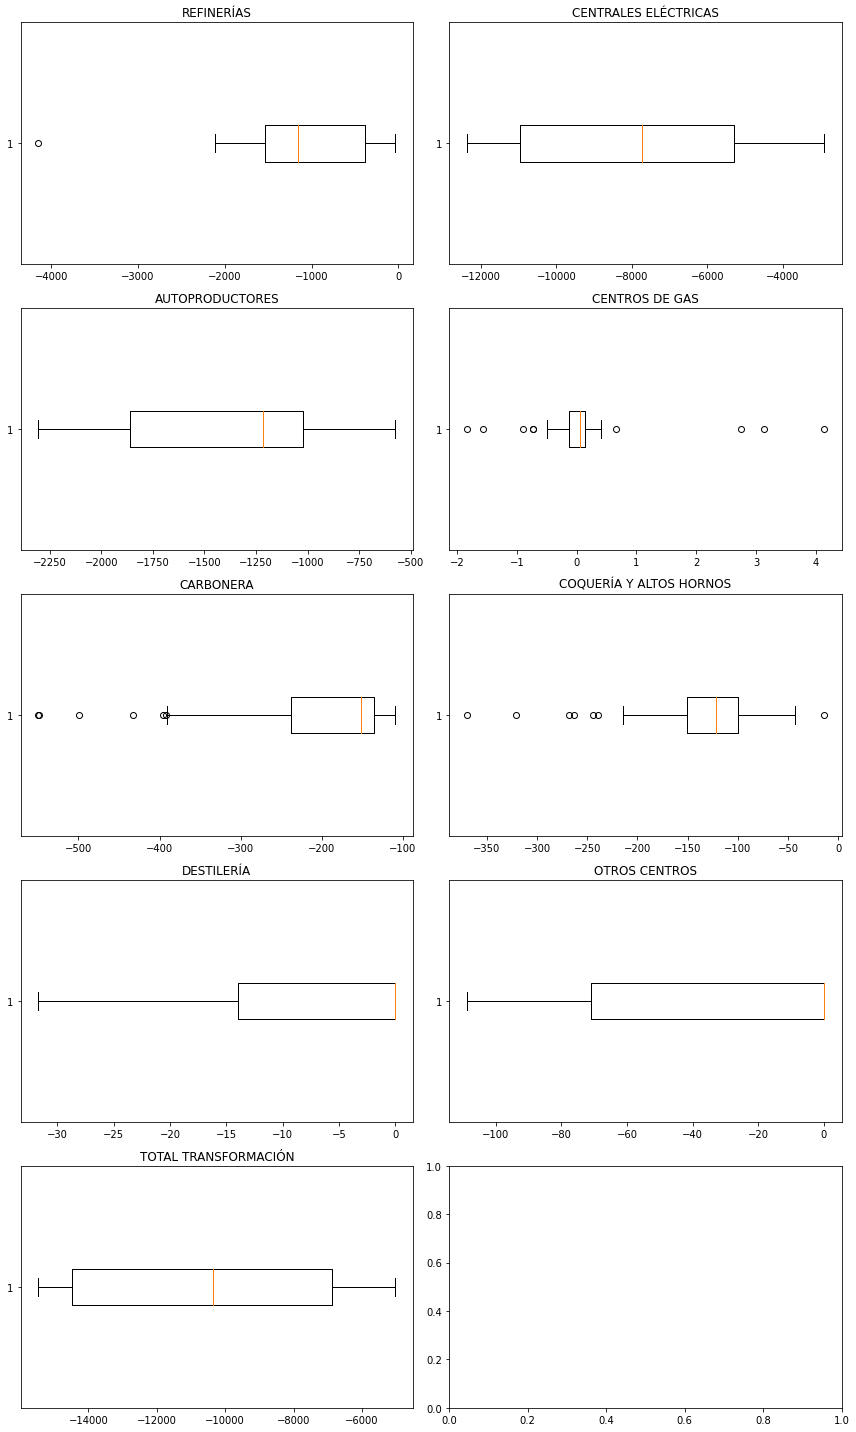

In [45]:
# Seleccionar las columnas de interés para el análisis
columns_of_interest = [
    'REFINERÍAS', 'CENTRALES ELÉCTRICAS', 'AUTOPRODUCTORES', 'CENTROS DE GAS',
    'CARBONERA', 'COQUERÍA Y ALTOS HORNOS', 'DESTILERÍA', 'OTROS CENTROS',
    'TOTAL TRANSFORMACIÓN'
]

# Crear subplots para cada columna
num_plots = len(columns_of_interest)
num_cols = 2
num_rows = (num_plots + 1) // num_cols
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))

# Asegurarnos de que axs sea un arreglo de 2D incluso si solo hay una fila
if num_rows == 1:
    axs = axs.reshape(1, -1)

# Generar boxplots para cada columna
for idx, col_name in enumerate(columns_of_interest):
    row = idx // num_cols
    col = idx % num_cols
    axs[row, col].boxplot(df_transformacion[col_name], vert=False)
    axs[row, col].set_title(col_name)

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()


In [46]:
import pandas as pd

# Leer los datos desde el archivo Excel
df_transformacion = pd.read_excel('Transform.xlsx')

# Seleccionar las columnas de interés para el análisis
columns_of_interest = [
    'REFINERÍAS', 'CENTRALES ELÉCTRICAS', 'AUTOPRODUCTORES', 'CENTROS DE GAS',
    'CARBONERA', 'COQUERÍA Y ALTOS HORNOS', 'DESTILERÍA', 'OTROS CENTROS',
    'TOTAL TRANSFORMACIÓN'
]

# Calcular los límites inferior y superior para los outliers
def calculate_outlier_bounds(series, multiplier=2.1):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return lower_bound, upper_bound

# Crear un DataFrame para almacenar los datos sin outliers
df_no_outliers = pd.DataFrame()

# Eliminar outliers y copiar los datos limpios al nuevo DataFrame
for col_name in columns_of_interest:
    lower_bound, upper_bound = calculate_outlier_bounds(df_transformacion[col_name])
    df_no_outliers[col_name] = df_transformacion[(df_transformacion[col_name] >= lower_bound) & (df_transformacion[col_name] <= upper_bound)][col_name]

# Mostrar la cantidad de datos eliminados por columna
outliers_removed = len(df_transformacion) - len(df_no_outliers)
print(f"Datos eliminados: {outliers_removed}")

# Agregar una columna 'año' al DataFrame df_no_outliers
df_no_outliers.reset_index(inplace=True)
df_no_outliers['año'] = df_transformacion['año']
df_no_outliers.set_index('index', inplace=True)

# Guardar el nuevo DataFrame sin outliers en un archivo Excel
df_no_outliers.to_excel('Transform_no_outlierss.xlsx', index=False)


Datos eliminados: 1


C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No 


Tablas de Predicciones:
             REFINERÍAS  CENTRALES ELÉCTRICAS  AUTOPRODUCTORES  \
2022-01-01 -1444.392923         -11030.512443     -1970.244718   
2023-01-01 -1438.252021         -11194.529521     -1942.847647   
2024-01-01 -1441.239600         -11201.673664     -1938.656310   
2025-01-01 -1436.481951         -11212.765534     -1940.802975   
2026-01-01 -1438.719185         -11162.225345     -1948.927369   
2027-01-01 -1420.980650         -11292.412061     -1939.029567   
2028-01-01 -1454.501482         -11152.596281     -1936.331935   
2029-01-01 -1495.106115         -11167.340938     -1895.962660   
2030-01-01 -1512.550867         -10955.065377     -1922.673728   
2031-01-01 -1526.044915         -10812.003795     -1939.075376   
2032-01-01 -1581.255410         -10592.515475     -1932.456755   
2033-01-01 -1486.609157         -10945.978821     -1948.397845   

            CENTROS DE GAS   CARBONERA  COQUERÍA Y ALTOS HORNOS  DESTILERÍA  \
2022-01-01        0.088490 -114.65945

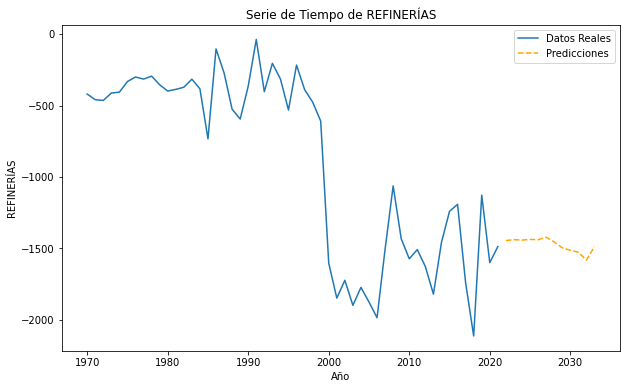

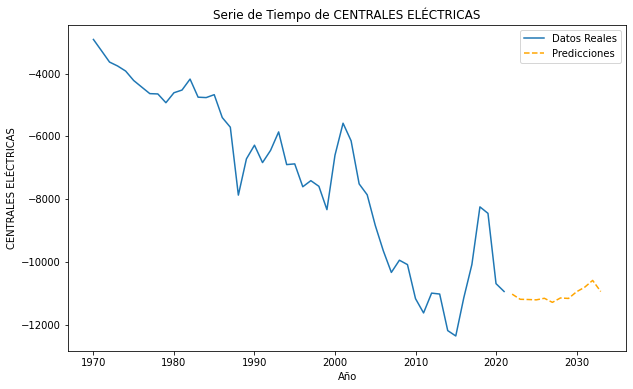

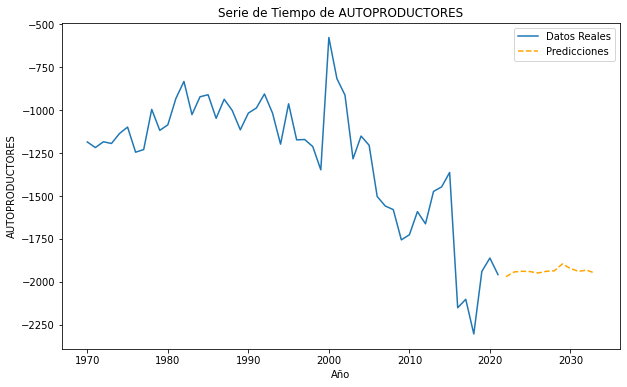

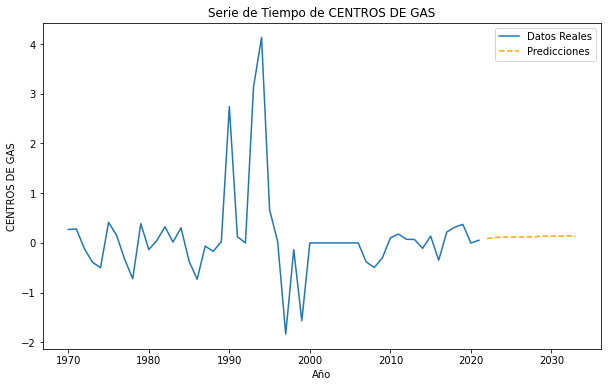

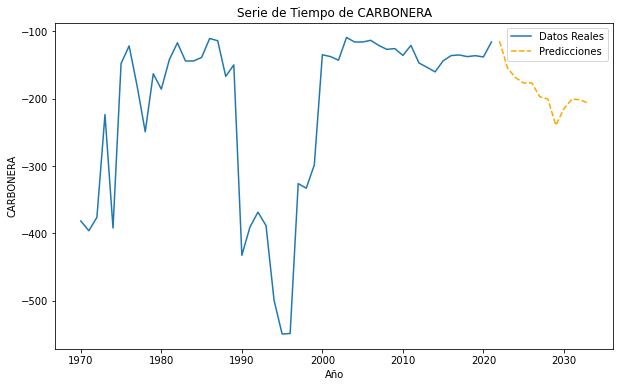

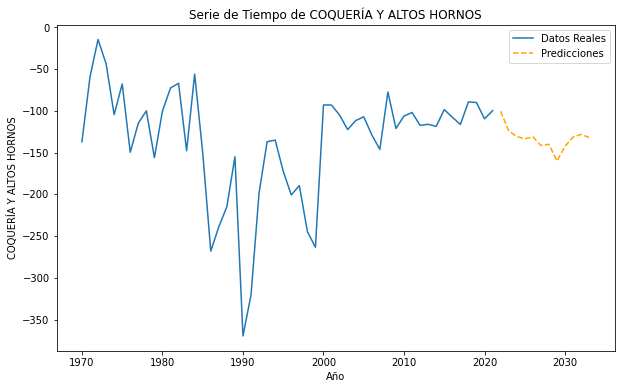

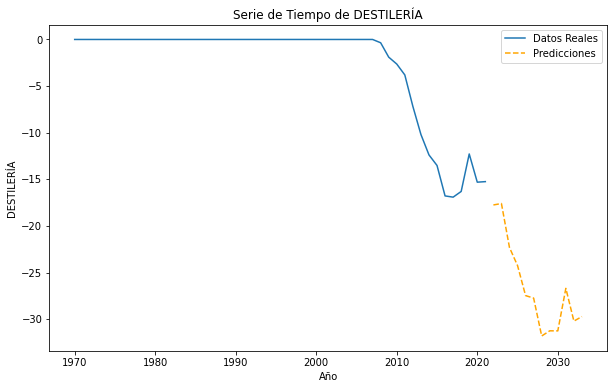

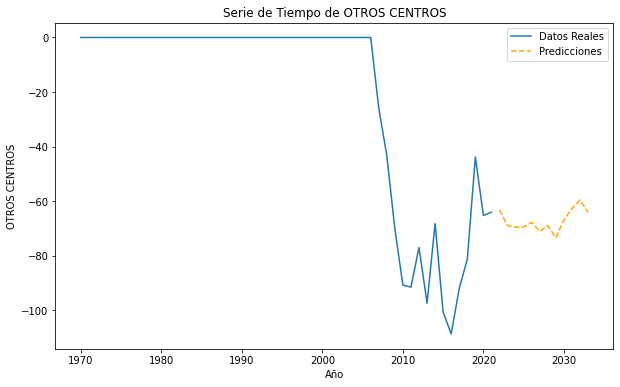

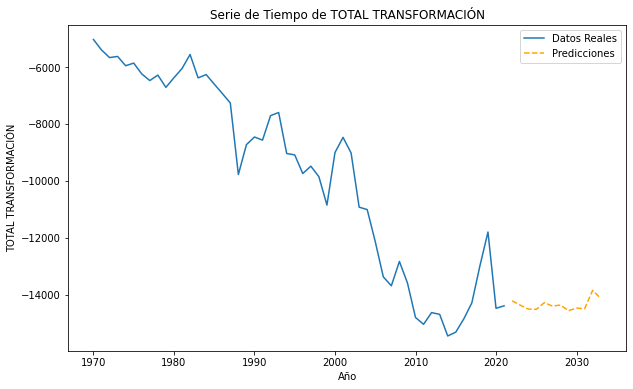


MAPEs:
REFINERÍAS: 13.52%
CENTRALES ELÉCTRICAS: 8.18%
AUTOPRODUCTORES: 16.85%
CENTROS DE GAS: 454.14%
CARBONERA: 39.42%
COQUERÍA Y ALTOS HORNOS: 27.54%
DESTILERÍA: 173.98%
OTROS CENTROS: 20.80%
TOTAL TRANSFORMACIÓN: 5.81%


In [48]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Leer datos desde el archivo Excel
df_transformacion = pd.read_excel('Transform_no_outlierss.xlsx')
df_vars = pd.read_excel("variables explicativas.xlsx")

df_vars.rename(columns={'Año': 'año'}, inplace=True)
df_merged = df_transformacion.merge(df_vars, left_on='año', right_on='año')

# Convertir la columna 'año' a datetime
if not isinstance(df_merged['año'], pd.DatetimeIndex):
    df_merged['año'] = pd.to_datetime(df_merged['año'], format='%Y')


df_merged.set_index('año', inplace=True)

# Realizar búsqueda automática de hiperparámetros y predicción 
forecast_steps = 12
mape_dict = {} 
predictions = pd.DataFrame()  

columns_of_interest = [
    'REFINERÍAS','CENTRALES ELÉCTRICAS','AUTOPRODUCTORES','CENTROS DE GAS',
    'CARBONERA','COQUERÍA Y ALTOS HORNOS','DESTILERÍA','OTROS CENTROS',
    'TOTAL TRANSFORMACIÓN'
]

for col_name in columns_of_interest:
    future_exog = df_merged[['PIB', 'Desempleo']].tail(forecast_steps).values
    
    # Buscar los mejores parámetros con auto_arima
    stepwise_fit = auto_arima(df_merged[col_name], exogenous=df_merged[['PIB', 'Desempleo']], seasonal=True, m=12, suppress_warnings=True, stepwise=True)
    order = stepwise_fit.get_params()['order']
    seasonal_order = stepwise_fit.get_params()['seasonal_order']
    
    # Ajustar el modelo SARIMAX y realizar predicciones
    model = SARIMAX(endog=df_merged[col_name], exog=df_merged[['PIB', 'Desempleo']], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    forecast = model_fit.get_forecast(steps=forecast_steps, exog=future_exog).predicted_mean
    
    predictions[col_name] = forecast
    
    # Calcular MAPE
    actual_values = df_merged[col_name][-forecast_steps:].values
    mape = np.mean(np.abs((actual_values - forecast) / actual_values)) * 100
    mape_dict[col_name] = mape

# Ordenar los índices de los DataFrames para asegurarnos de que estén alineados
df_merged.sort_index(inplace=True)
predictions.sort_index(inplace=True)

# Mostrar tablas de predicciones
print("\nTablas de Predicciones:")
print(predictions)

# Mostrar gráficos de series de tiempo
for col_name in predictions.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df_merged.index, df_merged[col_name], label='Datos Reales')
    plt.plot(predictions.index, predictions[col_name], label='Predicciones', linestyle='dashed', color='orange')
    plt.title(f'Serie de Tiempo de {col_name}')
    plt.xlabel('Año')
    plt.ylabel(col_name)
    plt.legend()
    plt.show()

# Imprimir MAPEs
print("\nMAPEs:")
for col_name, mape in mape_dict.items():
    print(f"{col_name}: {mape:.2f}%")

predictions.to_excel('Resultados_Transf.xlsx', index=True)


INTERPRETACION DE RESULTADOS:

REFINERÍAS: 13.48%, sugiere que el modelo tiene una buena precisión al predecir los datos.

CENTRALES ELÉCTRICAS: 9,06% El modelo tiene una precisión relativamente alta al predecir los valores de esta categoría.

AUTOPRODUCTORES: 17,09% Aunque ligeramente más alto que en las categorías anteriores, aún se considera aceptable para muchas aplicaciones.

CENTROS DE GAS: 399,93%, Sugiere que el modelo tiene dificultades significativas para predecir los valores reales en esta categoría. Las predicciones están muy alejadas de los valores reales.

CARBONERA: 47.46% Aunque es un MAPE relativamente alto, podría considerarse aceptable dependiendo del contexto de tus datos y del análisis que estás realizando.

COQUERÍA Y ALTOS HORNOS:35.58% El modelo tiene una precisión moderada al predecir los valores en esta categoría.

DESTILERÍA: 225% El modelo tiene dificultades importantes para predecir esta categoría.

OTROS CENTROS: 17.91%: aunque el MAPE es ligeramente más alto, aún puede considerarse aceptable.

TOTAL TRANSFORMACIÓN: 5,87%. Esto sugiere que el modelo tiene una muy buena precisión en la predicción de los valores totales de transformación.

CONCLUSIÓN: Con el tratamiento de los datos atípicos vemos que no mejora el MAPE de 'CENTROS DE GAS' por lo que descartamos la utilización de de dicha predicción para la resolución del proyecto.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency N will be used.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency N will be used.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency N will be used.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency N will be used.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning:

Non-invertibl

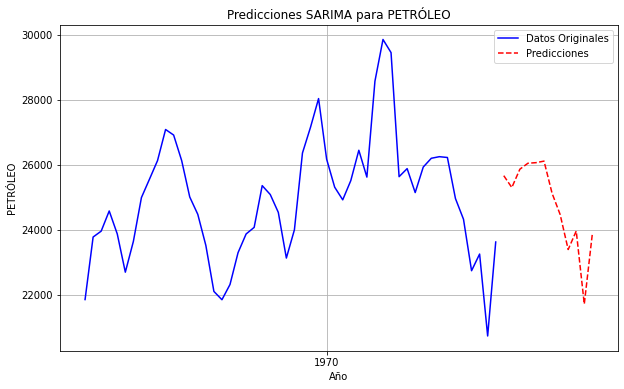

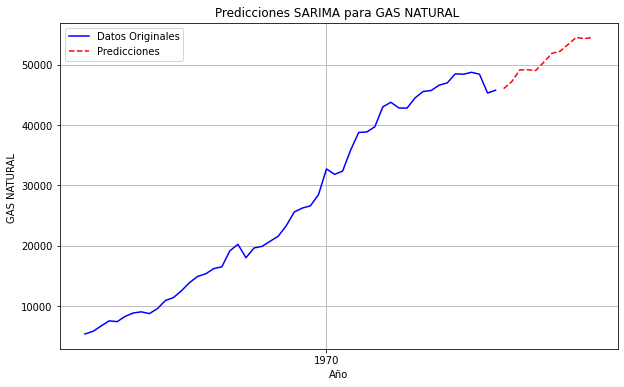

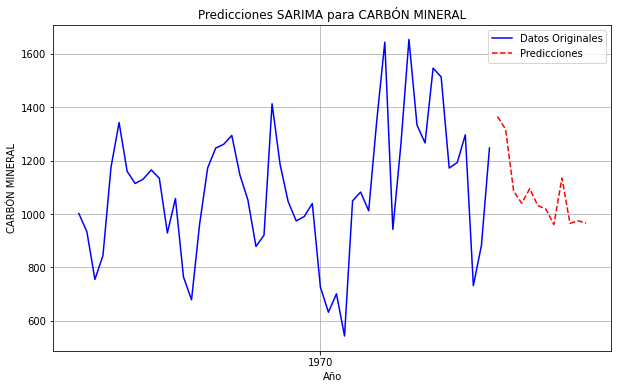

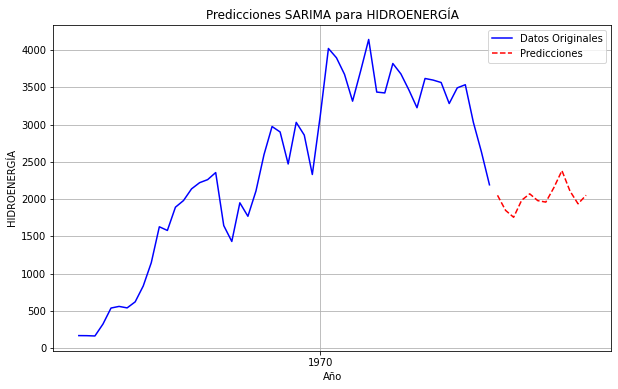

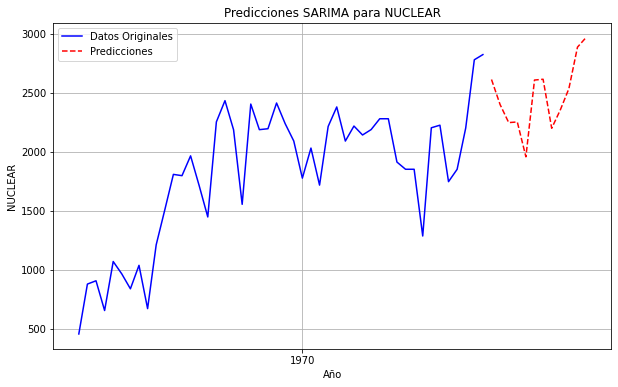

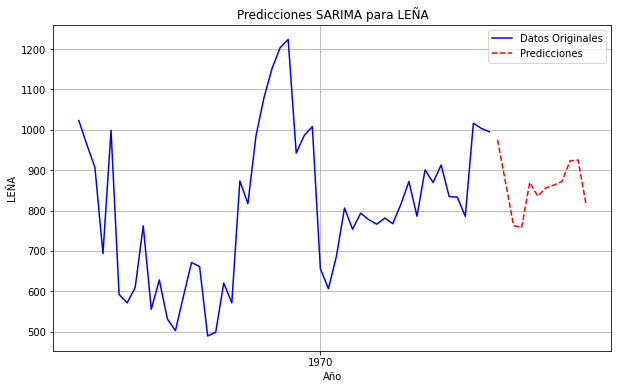

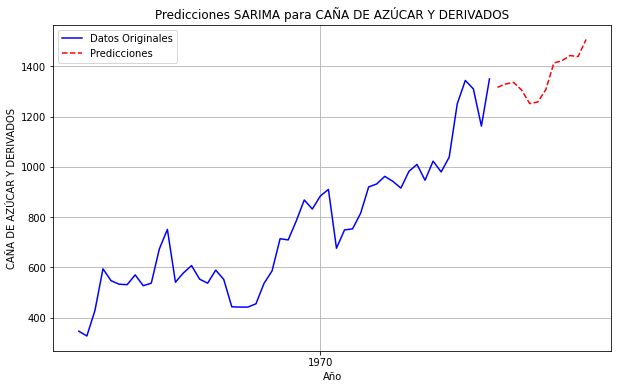

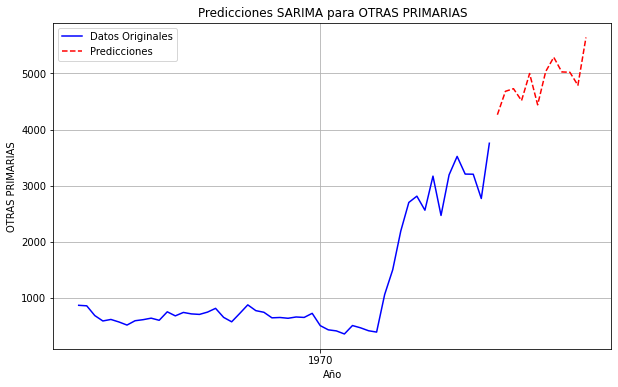

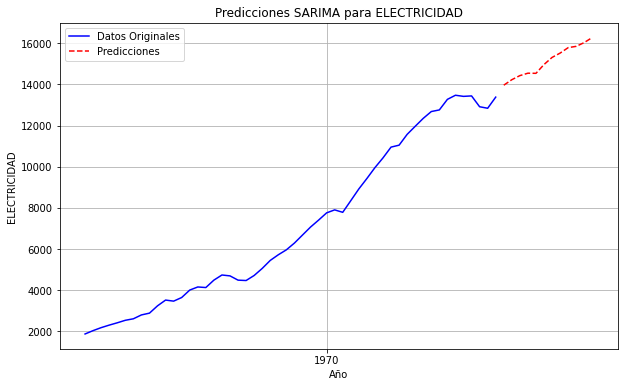

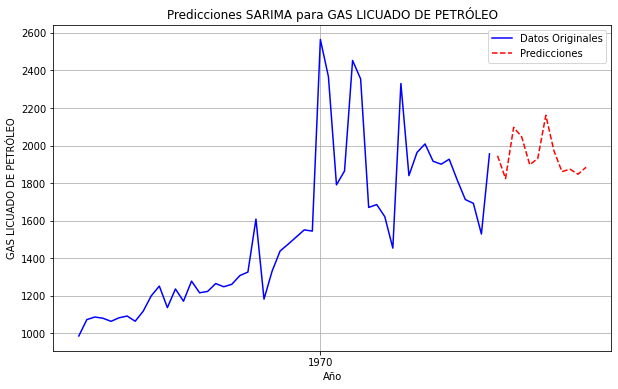

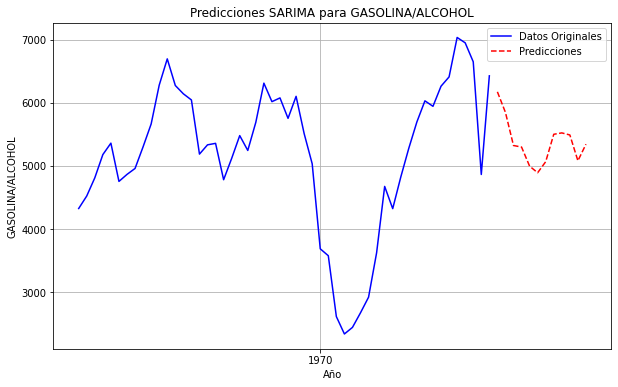

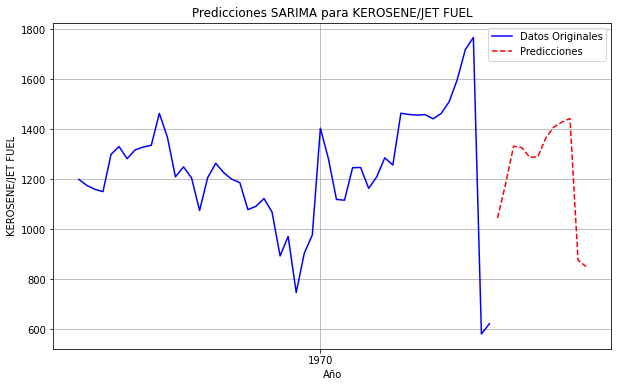

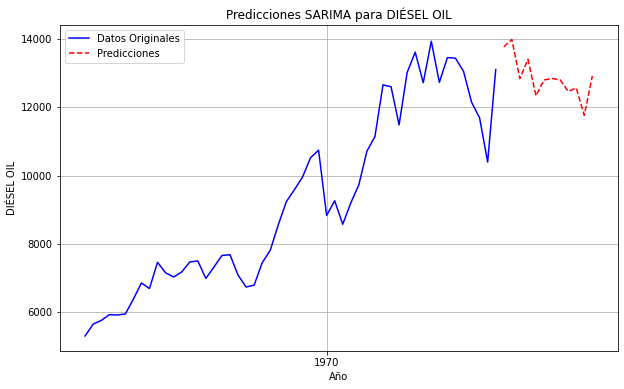

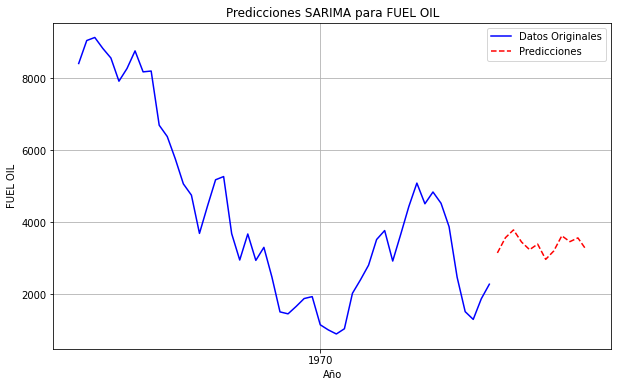

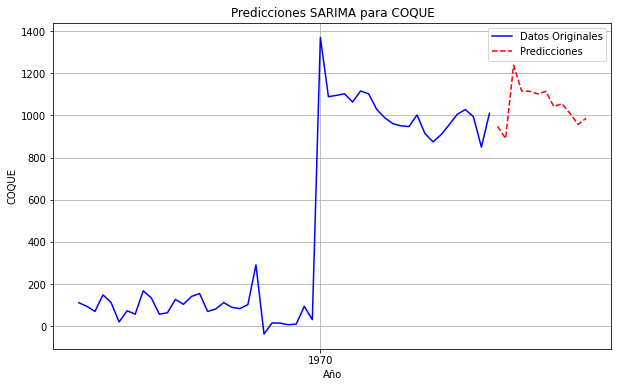

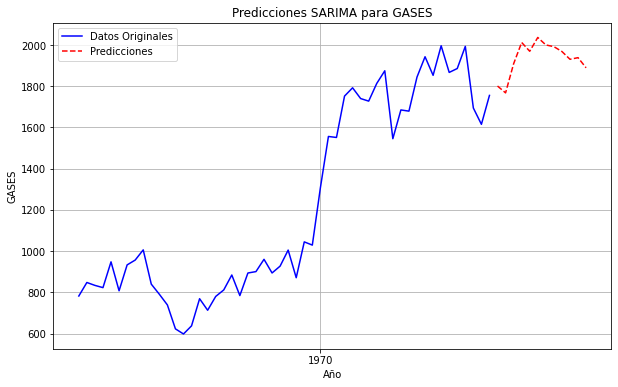

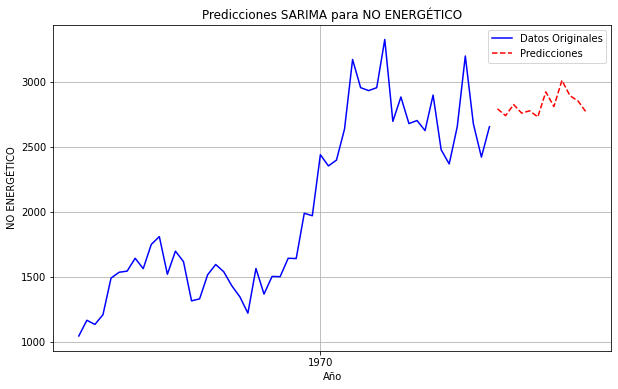

Predicciones para los próximos 10 años:
                                   PETRÓLEO  GAS NATURAL   CARBÓN MINERAL  \
1970-01-01 00:00:00.000002022  25665.696281  46055.424158     1365.253422   
1970-01-01 00:00:00.000002023  25300.608962  47195.189256     1317.574743   
1970-01-01 00:00:00.000002024  25865.066143  49154.209473     1086.718054   
1970-01-01 00:00:00.000002025  26048.350652  49180.582146     1040.109575   
1970-01-01 00:00:00.000002026  26066.071132  49066.952142     1094.515194   
1970-01-01 00:00:00.000002027  26113.712808  50463.202770     1031.754836   
1970-01-01 00:00:00.000002028  25123.875316  51917.216784     1018.537948   
1970-01-01 00:00:00.000002029  24471.859274  52246.499378      960.230773   
1970-01-01 00:00:00.000002030  23392.730664  53378.917677     1134.599907   
1970-01-01 00:00:00.000002031  23961.213824  54541.843914      965.200732   
1970-01-01 00:00:00.000002032  21714.312977  54352.487178      974.352869   
1970-01-01 00:00:00.000002033  23874

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Leer datos desde el archivo Excel
df_ajuste = pd.read_excel('Datos_OT.xlsx')
df_vars = pd.read_excel("variables explicativas.xlsx")

df_merged = pd.merge(df_ajuste, df_vars, on='Año')

# Convertir la columna 'Año' al tipo de dato datetime si aún no lo es
if not isinstance(df_merged['Año'], pd.DatetimeIndex):
    df_merged['Año'] = pd.to_datetime(df_merged['Año'])

# Establecer 'Año' como el índice del DataFrame
df_merged.set_index('Año', inplace=True)

# Función para ajustar el modelo SARIMA y realizar predicciones
def fit_sarima_and_forecast(endog, order, seasonal_order, forecast_steps):
    model = SARIMAX(endog=endog, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=forecast_steps)
    return predictions

# Especificar los parámetros del modelo SARIMA para cada columna
sarima_params = {
    'PETRÓLEO': ((1, 0, 1), (0, 1, 1, 12)),
    'GAS NATURAL ': ((1, 0, 1), (0, 1, 1, 12)),
    'CARBÓN MINERAL': ((1, 0, 1), (0, 1, 1, 12)),
    'HIDROENERGÍA': ((1, 0, 1), (0, 1, 1, 12)),
    'NUCLEAR': ((1, 0, 1), (0, 1, 1, 12)),
    'LEÑA': ((1, 0, 1), (0, 1, 1, 12)),
    'CAÑA DE AZÚCAR Y DERIVADOS': ((1, 0, 1), (0, 1, 1, 12)),
    'OTRAS PRIMARIAS': ((1, 0, 1), (0, 1, 1, 12)),
    'ELECTRICIDAD': ((1, 0, 1), (0, 1, 1, 12)),
    'GAS LICUADO DE PETRÓLEO': ((1, 0, 1), (0, 1, 1, 12)),
    'GASOLINA/ALCOHOL': ((1, 0, 1), (0, 1, 1, 12)),
    'KEROSENE/JET FUEL': ((1, 0, 1), (0, 1, 1, 12)),
    'DIÉSEL OIL': ((1, 0, 1), (0, 1, 1, 12)),
    'FUEL OIL': ((1, 0, 1), (0, 1, 1, 12)),
    'COQUE': ((1, 0, 1), (0, 1, 1, 12)),
    'GASES': ((1, 0, 1), (0, 1, 1, 12)),
    'NO ENERGÉTICO': ((1, 0, 1), (0, 1, 1, 12))
}

predictions = pd.DataFrame()

# Realizar la búsqueda de hiperparámetros y predicción 
forecast_steps = 12
for col, order in sarima_params.items():
    best_mse = float('inf')
    best_order = None
    best_seasonal_order = None
    
    order_params, seasonal_order_params = order
    mse = np.mean((fit_sarima_and_forecast(df_merged[col], order_params, seasonal_order_params, forecast_steps) - df_merged[col][-forecast_steps:]) ** 2)
    if mse < best_mse:
        best_mse = mse
        best_order = order_params
        best_seasonal_order = seasonal_order_params
    
    if best_order is None:
        best_order = (1, 0, 1)  
        best_seasonal_order = (0, 1, 1, 12) 
    
    forecast = fit_sarima_and_forecast(df_merged[col], best_order, best_seasonal_order, forecast_steps)
    predictions[col] = forecast


# Ordenar los índices de los DataFrames para asegurarnos de que estén alineados
df_merged.sort_index(inplace=True)
predictions.sort_index(inplace=True)

# Visualizar las predicciones y los datos originales en gráficos separados para cada columna
for col in predictions.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df_merged.index, df_merged[col], label='Datos Originales', color='blue')
    plt.plot(predictions.index, predictions[col], label='Predicciones', color='red', linestyle='--')
    plt.title(f'Predicciones SARIMA para {col}')
    plt.xlabel('Año')
    plt.ylabel(col)
    plt.grid(True)
    plt.legend()
    plt.show()

# Imprimir las predicciones para los próximos 10 años
print("Predicciones para los próximos 10 años:")
print(predictions)

# Calcular el MAPE para cada columna
mape_results = {}
for col in predictions.columns:
    actual_values = df_merged[col][-forecast_steps:].values
    predicted_values = predictions[col].values
    
    absolute_error = np.abs(actual_values - predicted_values)
    relative_error = absolute_error / np.maximum(np.abs(actual_values), np.finfo(float).eps)
    mape = np.mean(relative_error) * 100
    mape_results[col] = mape

    # Imprimir los resultados del MAPE
for col, mape in mape_results.items():
    print(f"MAPE para '{col}': {mape:.2f}%")


predictions.to_excel('Resultados_Fuentes.xlsx', index=True)


C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency N will be used.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency N will be used.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\34664\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency N will be used.

C:\Users\346

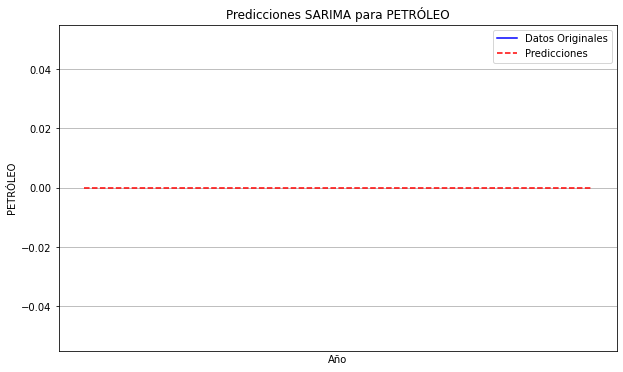

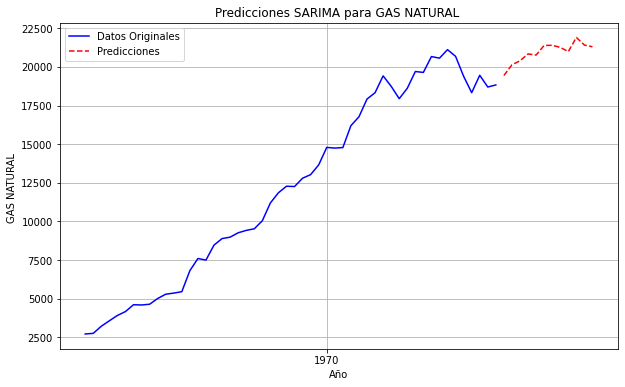

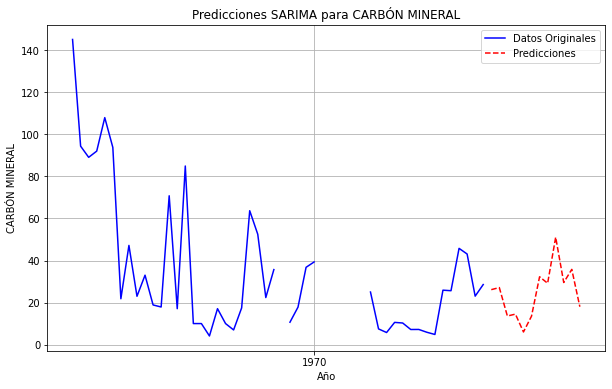

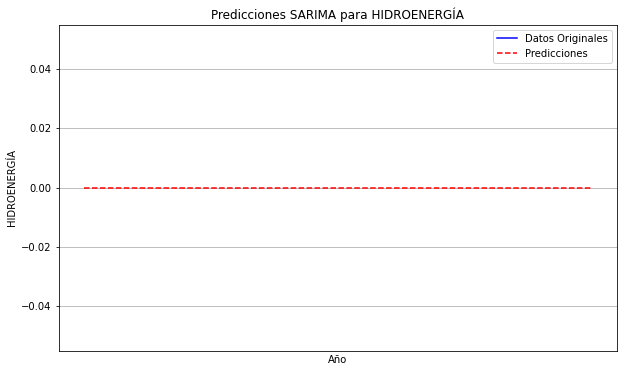

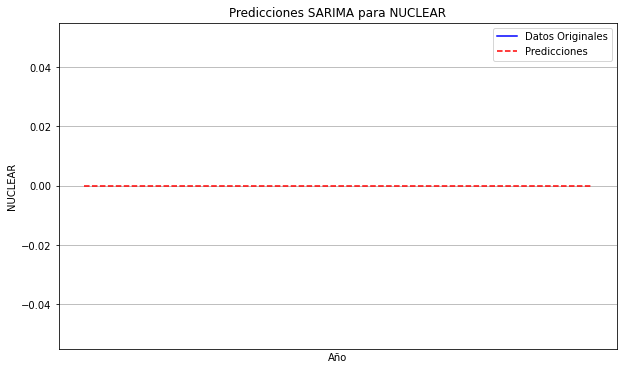

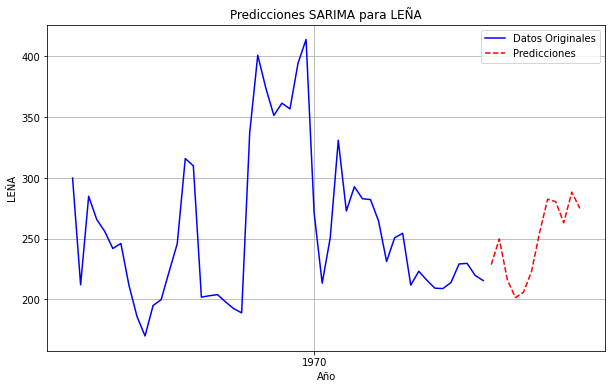

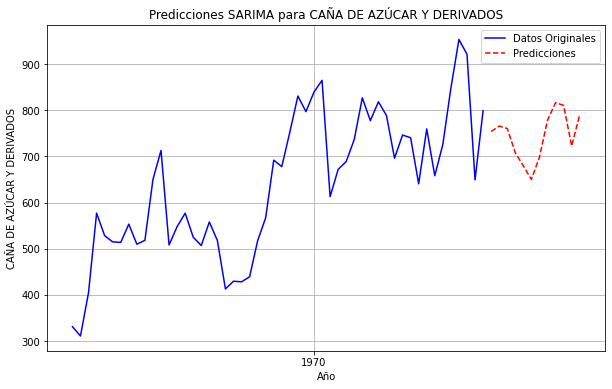

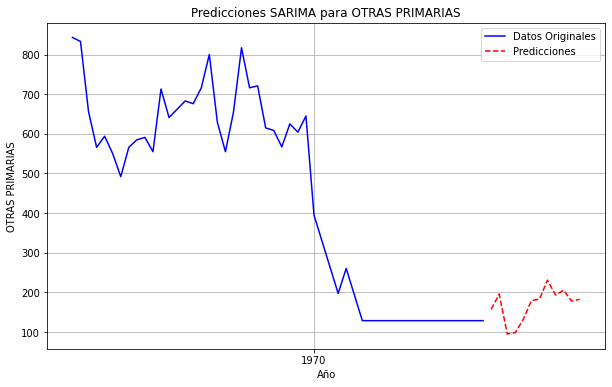

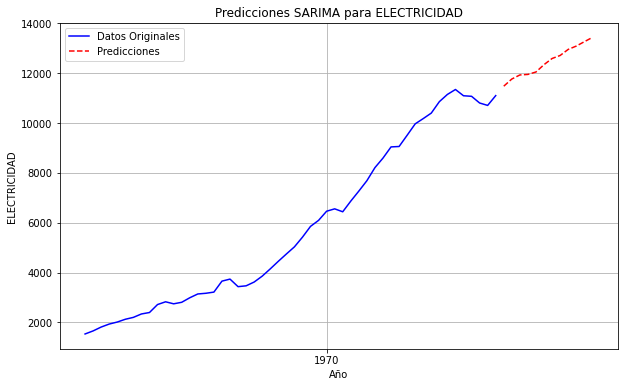

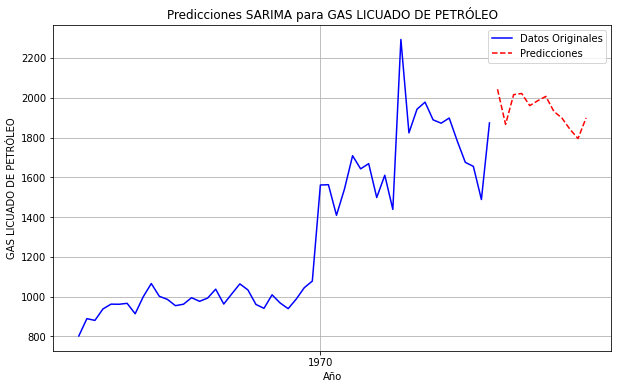

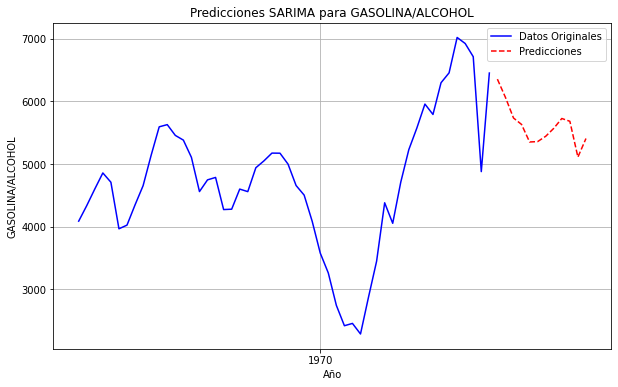

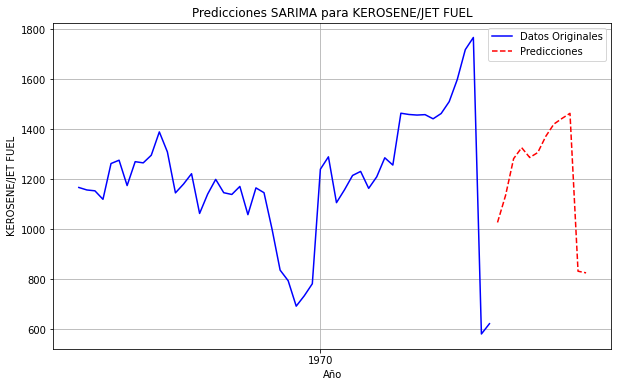

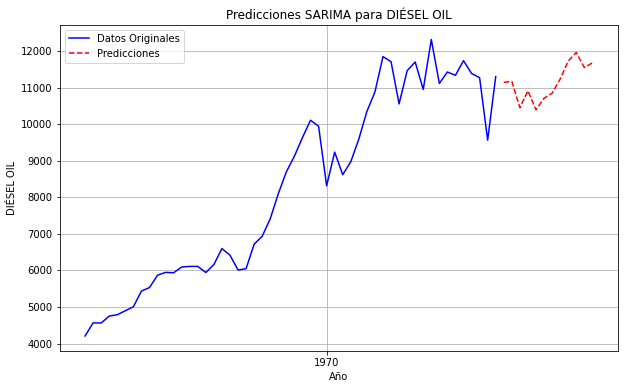

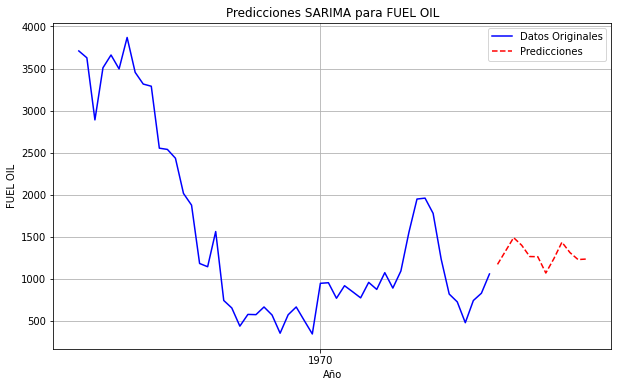

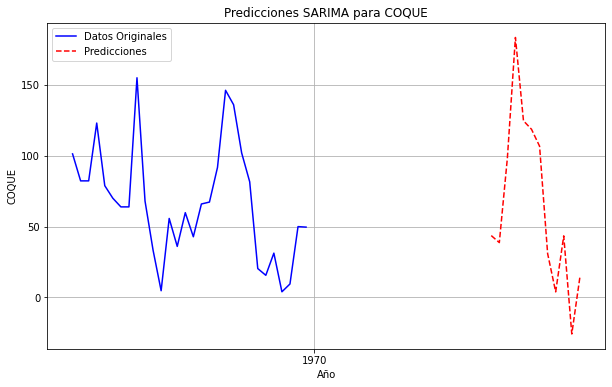

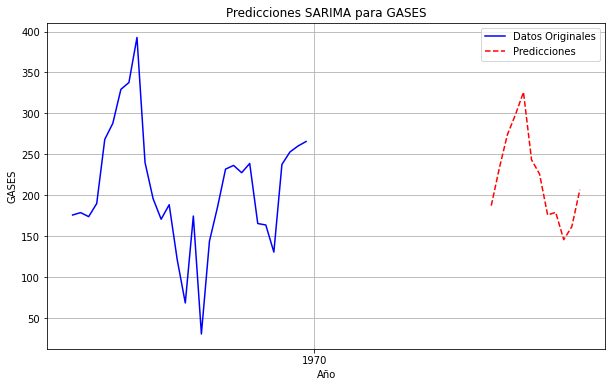

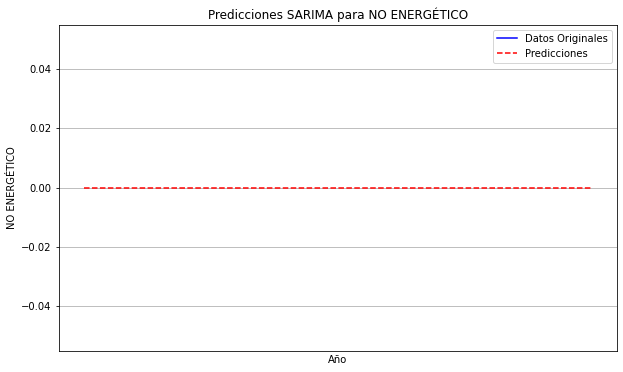

Predicciones para los próximos 10 años:
                               PETRÓLEO  GAS NATURAL   CARBÓN MINERAL  \
1970-01-01 00:00:00.000002022       0.0  19445.513284       26.163166   
1970-01-01 00:00:00.000002023       0.0  20137.648499       27.145858   
1970-01-01 00:00:00.000002024       0.0  20395.881256       13.615095   
1970-01-01 00:00:00.000002025       0.0  20841.725030       14.522894   
1970-01-01 00:00:00.000002026       0.0  20767.165924        6.036188   
1970-01-01 00:00:00.000002027       0.0  21391.723613       13.556322   
1970-01-01 00:00:00.000002028       0.0  21400.306481       32.292736   
1970-01-01 00:00:00.000002029       0.0  21264.212937       29.188388   
1970-01-01 00:00:00.000002030       0.0  20992.220434       51.094886   
1970-01-01 00:00:00.000002031       0.0  21906.875732       29.557888   
1970-01-01 00:00:00.000002032       0.0  21415.719144       35.796020   
1970-01-01 00:00:00.000002033       0.0  21306.123008       18.048452   

          

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Leer datos desde el archivo Excel
Data_CF = pd.read_excel('Data_CF.xlsx')
df_vars = pd.read_excel("variables explicativas.xlsx")

df_merged = pd.merge(Data_CF, df_vars, on='Año')

# Convertir la columna 'Año' al tipo de dato datetime si aún no lo es
if not isinstance(df_merged['Año'], pd.DatetimeIndex):
    df_merged['Año'] = pd.to_datetime(df_merged['Año'])

# Establecer 'Año' como el índice del DataFrame
df_merged.set_index('Año', inplace=True)

# Función para ajustar el modelo SARIMA y realizar predicciones
def fit_sarima_and_forecast(endog, order, seasonal_order, forecast_steps):
    model = SARIMAX(endog=endog, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=forecast_steps)
    return predictions

# Especificar los parámetros del modelo SARIMA para cada columna
sarima_paramss = {
    'PETRÓLEO': ((1, 0, 1), (0, 1, 1, 12)),
    'GAS NATURAL ': ((1, 0, 1), (0, 1, 1, 12)),
    'CARBÓN MINERAL': ((1, 0, 1), (0, 1, 1, 12)),
    'HIDROENERGÍA': ((1, 0, 1), (0, 1, 1, 12)),
    'NUCLEAR': ((1, 0, 1), (0, 1, 1, 12)),
    'LEÑA': ((1, 0, 1), (0, 1, 1, 12)),
    'CAÑA DE AZÚCAR Y DERIVADOS': ((1, 0, 1), (0, 1, 1, 12)),
    'OTRAS PRIMARIAS': ((1, 0, 1), (0, 1, 1, 12)),
    'GAS LICUADO DE PETRÓLEO': ((1, 0, 1), (0, 1, 1, 12)),
    'GASOLINA/ALCOHOL': ((1, 0, 1), (0, 1, 1, 12)),
    'KEROSENE/JET FUEL': ((1, 0, 1), (0, 1, 1, 12)),
    'DIÉSEL OIL': ((1, 0, 1), (0, 1, 1, 12)),
    'FUEL OIL': ((1, 0, 1), (0, 1, 1, 12)),
    'COQUE': ((1, 0, 1), (0, 1, 1, 12)),
    'GASES': ((1, 0, 1), (0, 1, 1, 12)),
    'NO ENERGÉTICO': ((1, 0, 1), (0, 1, 1, 12))
}

# Crear DataFrame para almacenar las predicciones
predictions = pd.DataFrame()

# Realizar la búsqueda de hiperparámetros y predicción
forecast_steps = 12
for col, order in sarima_params.items():
    best_mse = float('inf')
    best_order = None
    best_seasonal_order = None
    
    order_params, seasonal_order_params = order
    mse = np.mean((fit_sarima_and_forecast(df_merged[col], order_params, seasonal_order_params, forecast_steps) - df_merged[col][-forecast_steps:]) ** 2)
    if mse < best_mse:
        best_mse = mse
        best_order = order_params
        best_seasonal_order = seasonal_order_params
    
    if best_order is None:
        best_order = (1, 0, 1)  
        best_seasonal_order = (0, 1, 1, 12)  
    
    forecast = fit_sarima_and_forecast(df_merged[col], best_order, best_seasonal_order, forecast_steps)
    predictions[col] = forecast


# Ordenar los índices de los DataFrames
df_merged.sort_index(inplace=True)
predictions.sort_index(inplace=True)

# Visualizar las predicciones y los datos originales en gráficos 
for col in predictions.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df_merged.index, df_merged[col], label='Datos Originales', color='blue')
    plt.plot(predictions.index, predictions[col], label='Predicciones', color='red', linestyle='--')
    plt.title(f'Predicciones SARIMA para {col}')
    plt.xlabel('Año')
    plt.ylabel(col)
    plt.grid(True)
    plt.legend()
    plt.show()

# Imprimir las predicciones para los próximos 10 años
print("Predicciones para los próximos 10 años:")
print(predictions)

# Calcular el MAPE para cada columna
mape_results = {}
for col in predictions.columns:
    actual_values = df_merged[col][-forecast_steps:].values
    predicted_values = predictions[col].values
    
    absolute_error = np.abs(actual_values - predicted_values)
    relative_error = absolute_error / np.maximum(np.abs(actual_values), np.finfo(float).eps)
    mape = np.mean(relative_error) * 100
    mape_results[col] = mape

    # Imprimir los resultados del MAPE
for col, mape in mape_results.items():
    print(f"MAPE para '{col}': {mape:.2f}%")

predictions.to_excel('Resultados_FuenteConsumo.xlsx', index=True)


In [51]:
import pandas as pd
import plotly.graph_objects as go
import random

# Leer los datos desde el archivo Excel
df = pd.read_excel('SANKEY2023.xlsx', index_col=0)

# Definir los nodos de origen y destino para el diagrama Sankey
source_nodes = df.index.tolist()
target_nodes = df.columns.tolist()

# Crear una lista de enlaces que conectan los nodos de origen y destino con los valores correspondientes
links = []
for source_node in source_nodes:
    for target_node in target_nodes:
        value = df.loc[source_node, target_node] if target_node in df.columns else 0
        links.append({'source': source_node, 'target': target_node, 'value': value})

pastel_colors = []
for _ in links:
    r = random.randint(200, 255) 
    g = random.randint(200, 255)  
    b = random.randint(200, 255)  
    pastel_colors.append(f'rgb({r},{g},{b})')

# Crear el gráfico Sankey
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=source_nodes + target_nodes
    ),
    link=dict(
        source=[source_nodes.index(link['source']) for link in links],
        target=[len(source_nodes) + target_nodes.index(link['target']) for link in links],
        value=[link['value'] for link in links],
        color=pastel_colors  # Asignar colores tono pastel a las líneas
    )
))

# Configurar el diseño del gráfico y mostrarlo
fig.update_layout(title_text="Gráfico Sankey de Energía 2023", font_size=10)
fig.show()


In [52]:
import pandas as pd
import plotly.graph_objects as go
import random

# Leer los datos desde el archivo Excel
df = pd.read_excel('SANKEY2033.xlsx', index_col=0)

# Definir los nodos de origen y destino para el diagrama Sankey
source_nodes = df.index.tolist()
target_nodes = df.columns.tolist()

links = []
for source_node in source_nodes:
    for target_node in target_nodes:
        value = df.loc[source_node, target_node] if target_node in df.columns else 0
        links.append({'source': source_node, 'target': target_node, 'value': value})

pastel_colors = []
for _ in links:
    r = random.randint(200, 255)  
    g = random.randint(200, 255)  
    b = random.randint(200, 255)  
    pastel_colors.append(f'rgb({r},{g},{b})')

# Crear el gráfico Sankey
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=source_nodes + target_nodes
    ),
    link=dict(
        source=[source_nodes.index(link['source']) for link in links],
        target=[len(source_nodes) + target_nodes.index(link['target']) for link in links],
        value=[link['value'] for link in links],
        color=pastel_colors  # Asignar colores tono pastel a las líneas
    )
))

# Configurar el diseño del gráfico y mostrarlo
fig.update_layout(title_text="Gráfico Sankey de Energía 2033", font_size=10)
fig.show()
